# Seyed Mohammad Amin Atyabi - 830402014 - HW 4 (Part 3)

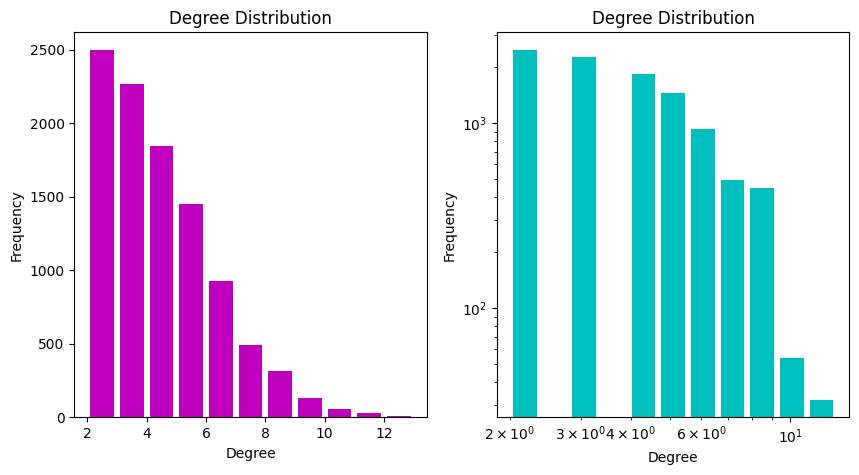

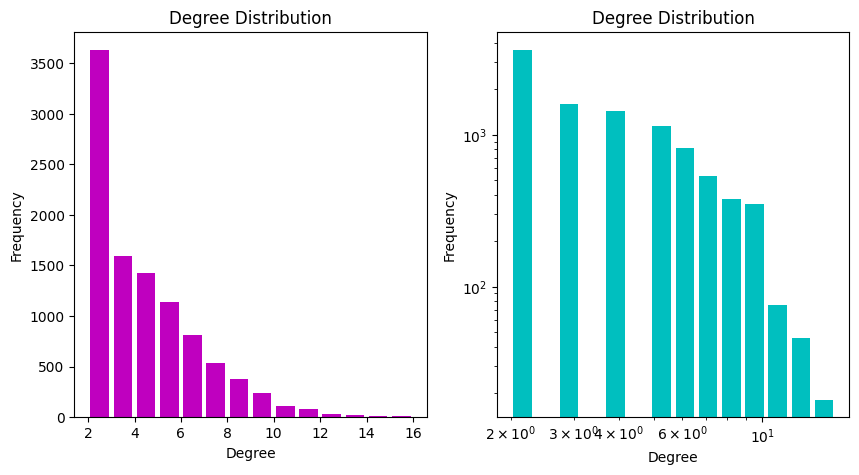

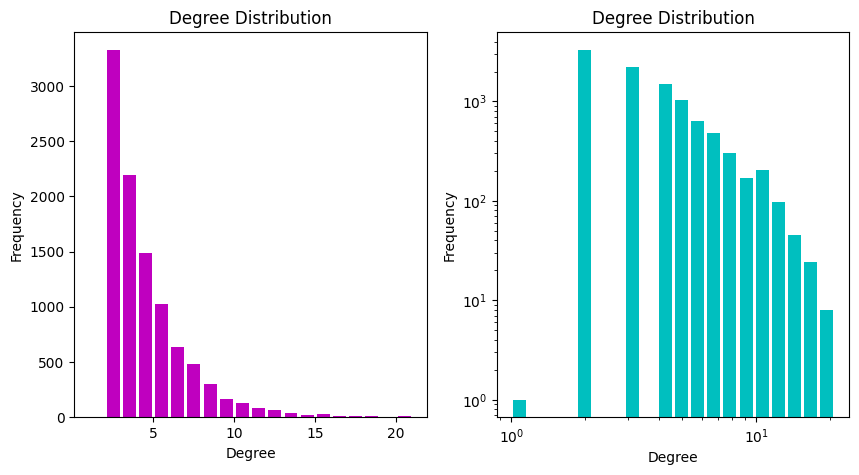

In [4]:
import numpy
import random
import networkx
from matplotlib import pyplot as plt


def create_graph(n, m, hidden_parameter):
    network = networkx.Graph()

    for i in range(n):
        probability = 0
        if hidden_parameter == "uniform":
            probability = random.uniform(0, 1)
        elif hidden_parameter == "normal":
            probability = random.normalvariate(1, 1)
        elif hidden_parameter == "exponential":
            probability = random.expovariate()
        network.add_node(i, probability=probability)

    for i in range(n):
        probs = networkx.get_node_attributes(network, "probability")
        attachment = random.choices(list(probs.keys()), weights=list(probs.values()), k=m)
        network.add_edges_from([(i, j) for j in attachment])

    return network


def plot_degree_distribution(network):
    degrees = [network.degree(n) for n in network.nodes()]
    min_degree = min(degrees)
    max_degree = max(degrees)
    bins = numpy.logspace(numpy.log10(min_degree), numpy.log10(max_degree), num=len(set(degrees)))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.hist(degrees, bins=list(set(degrees)), color='m', rwidth=0.8)

    plt.subplot(1, 2, 2)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.xscale('log')
    plt.yscale('log')
    plt.hist(degrees, bins=bins, color='c', rwidth=0.8)

    plt.show()


def draw_network(network):
    degrees = dict(network.degree())
    high_degree_threshold = max(degrees.values()) * 0.75
    node_colors = ['r' if degree > high_degree_threshold else 'c' for degree in degrees.values()]
    plt.figure(figsize=(60, 60))
    pos = networkx.spring_layout(network)
    networkx.draw(network, pos, node_color=node_colors, with_labels=False)
    networkx.draw_networkx_labels(network, pos, labels=degrees)
    plt.show()


g = create_graph(10000, 2, "uniform")
plot_degree_distribution(g)
# draw_network(g)

g = create_graph(10000, 2, "normal")
plot_degree_distribution(g)
# draw_network(g)

g = create_graph(10000, 2, "exponential")
plot_degree_distribution(g)
# draw_network(g)